## HOW DO SEARCH ENGINES WORK?


> CRAWLING
 -   Scour the Internet for content, looking over the code/content for each URL they find.
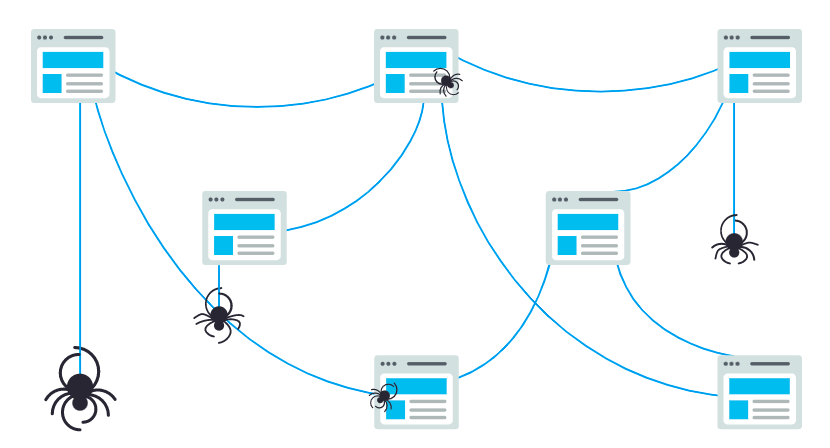



> INDEXING
 - Store and organize the content found during the crawling process. Once a page is in the index, it’s in the running to be displayed as a result to relevant queries.
 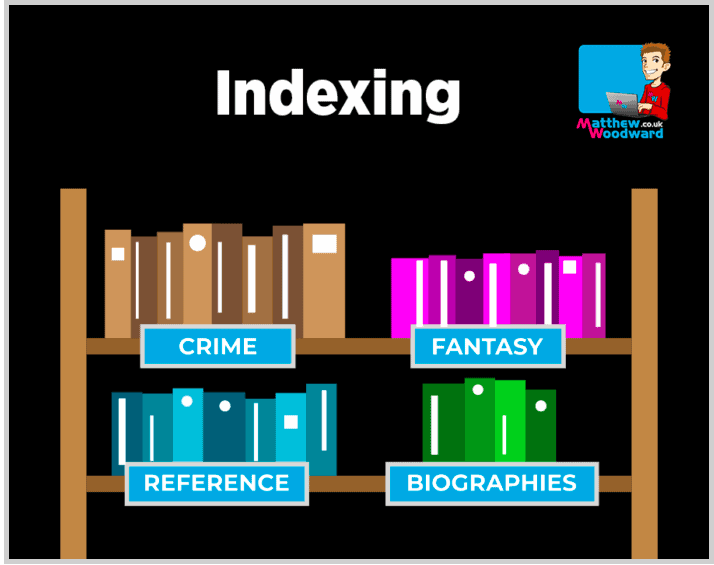

> RANKING
 - Provide the pieces of content that will best answer a searcher's query, which means that results are ordered by most relevant to least relevant.


  ## HOW TO RANK?

  ### Early 90s - *text based ranking systems*

  - It seems reasonable to imagine that what a search engine does is to keep an index of all web pages, and when a user types in a query search, the engine browses through its index and counts the occurrences of the key words in each web file. The winners are the pages with the highest number of occurrences of the key words. These get displayed back to the user.


  ## WILL IT WORK?
  

## ANOTHER APPROACH

> PageRank, 1998

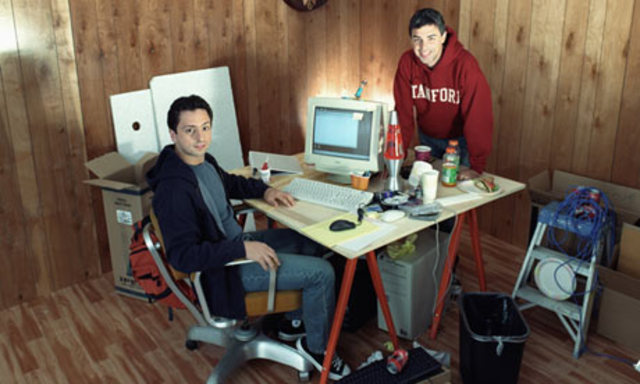


http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf

## WE have several pages. How we can represent it? As a graph!

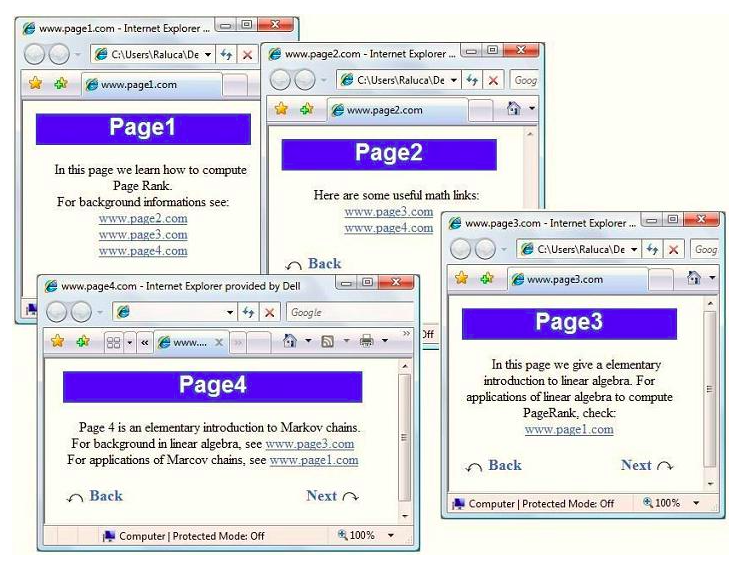

## We can easily represents web-pages as graph

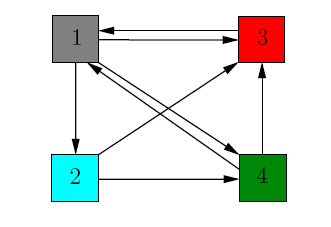

In [ ]:
import numpy as np
## Adjacency matrix:

A =  np.array([[0, 0, 1, 1],
               [1, 0, 0, 0],
               [1, 1, 0, 1],
               [1, 1, 0, 0]], dtype=np.float64)

A

array([[0., 0., 1., 1.],
       [1., 0., 0., 0.],
       [1., 1., 0., 1.],
       [1., 1., 0., 0.]])

We need to compute somehow the transition matrix (column-stohastic matrix with the probabilities of transition from $j$ node to $i$)

$$a_{i,j} \ge 0$$ and $$\sum_{j}a_{i,j} = 1$$

In [ ]:
from scipy.sparse import diags
import numpy as np
from scipy.linalg import lu
from time import time
import scipy.sparse as sp

def transition_matrix(G):
    sum1 = G.sum(axis=0)
    sum1[sum1 == 0] = 1
    if sp.issparse(G):

        A = G.multiply(1/sum1)
    else:
        A =  G * 1 /sum1

    return A

In [ ]:
transition_matrix(A)

array([[0.        , 0.        , 1.        , 0.5       ],
       [0.33333333, 0.        , 0.        , 0.        ],
       [0.33333333, 0.5       , 0.        , 0.5       ],
       [0.33333333, 0.5       , 0.        , 0.        ]])

Now imagine that we have $N$ users and their initial distribution $x_0=$ (it may be uniform, or whatever).

Each step in the graph can be expressed with multiplication of the trnsition matrix

So we get

$$Ax_0$$

on the first step

$$A (A x_0) = A^2 x_0$$

on the second step.


On the $k$$th step we obtain

$$A^k x_0$$


We will get $v = A^k x_0$ where $v$ presents the distribution of the $N$ after $k$ steps.

What is vectir $v$?


## POWER METHOD

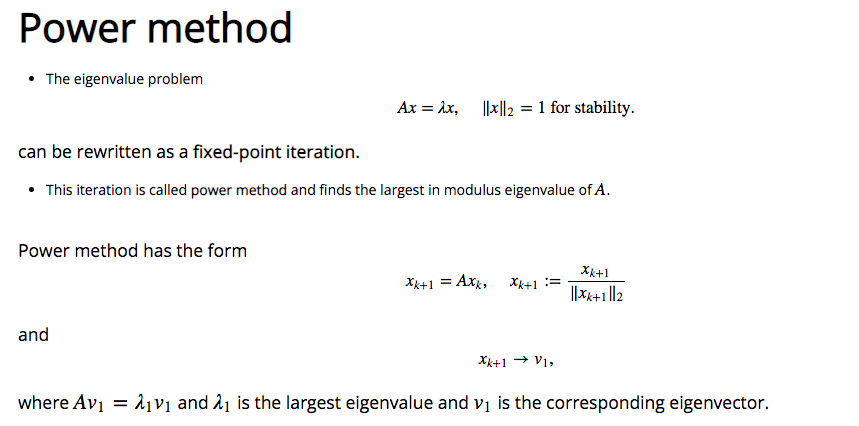

In [ ]:
def power_iteration(A, num_simulations: int):
    # Ideally choose a random vector
    # To decrease the chance that our vector
    # Is orthogonal to the eigenvector
    b_k = np.array([0.25, 0.25, 0.25, 0.25])#np.random.rand(A.shape[1])

    for _ in range(num_simulations):
        # calculate the matrix-by-vector product Ab
        b_k1 = A @ b_k
        b_k1_norm = np.linalg.norm(b_k1)
        b_k = b_k1 / b_k1_norm

    return b_k

power_iteration(transition_matrix(A), 8)

array([0.72076051, 0.24214102, 0.54009851, 0.36078472])

In [ ]:
power_iteration(transition_matrix(A), 100) /2

array([0.36050506, 0.12016835, 0.2703788 , 0.18025253])

In [ ]:
e, v = np.linalg.eig(transition_matrix(A))
v[:,0]

array([0.72101012+0.j, 0.24033671+0.j, 0.54075759+0.j, 0.36050506+0.j])

## Our final distribution - is yhe maximum eigen vector!

But ... Not that fast


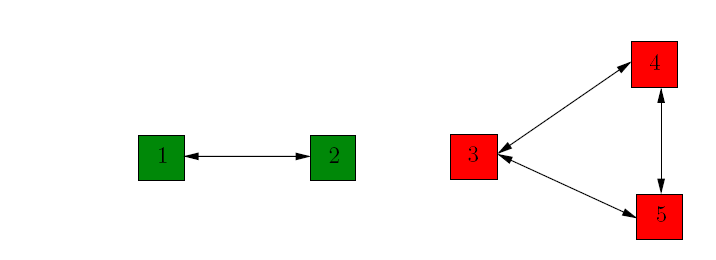

In [ ]:
A_disconnected = np.array([[0,1, 0, 0, 0],
                           [1, 0, 0, 0, 0],
                           [0, 0, 0 , 1, 1],
                           [0, 0, 1, 0, 1],
                           [0, 0 , 1, 1, 0]])

In [ ]:
A_disconnected


array([[0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 0, 1],
       [0, 0, 1, 1, 0]])

In [ ]:

transition_matrix(A_disconnected)

array([[0. , 1. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0.5],
       [0. , 0. , 0.5, 0. , 0.5],
       [0. , 0. , 0.5, 0.5, 0. ]])

In [ ]:
e_d, v_d = np.linalg.eig(transition_matrix(A_disconnected))
v_d

array([[ 0.70710678, -0.70710678,  0.        ,  0.        ,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.81649658,  0.57735027,  0.22645541],
       [ 0.        ,  0.        ,  0.40824829,  0.57735027, -0.79259392],
       [ 0.        ,  0.        ,  0.40824829,  0.57735027,  0.56613852]])

In [ ]:
e_d

array([ 1. , -1. , -0.5,  1. , -0.5])

## Here comes the PageRank magic!

Let's Denote $P$ as a Transition matrix, $d$ is a damping factor (0, 1), and $w$ is vector such as $w^{\top}e =1$ where $e = [1, 1, 1, \dots, 1, 1,1 ]$


Brin and Page introduced regularization trachique


$$
\textbf{M} = d \textbf{P} + (1-d) we^{\top}
$$

if we take $w = [\frac{1}{N}, \frac{1}{N}, \dots, \frac{1}{N}, \frac{1}{N}]$
$$
\textbf{M}  = d \textbf{P} + \frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix},
$$



Why this matrix is good?

**Perron-Frobenius Theorem**: If $M$ is a positive, column stochastic matrix, then:
 - 1 is an eigenvalue of multiplicity one.


- 1 is the largest eigenvalue: all the other eigenvalues have absolute value smaller than 1.


-  The eigenvectors corresponding to the eigenvalue 1 have either only positive entries or only negative entries. In particular, for the eigenvalue 1 there exists a unique eigenvector with the sum of its entries equal to 1.

**That provides Power Method convergency!**

Power Method Convergence Theorem: Let $M$ be a positive, column stochastic $n \times n$ matrix. Denote by $v$ its probabilistic eigenvector corresponding to the eigenvalue $1$. Let $z$ be the column vector with all entries equal to . Then the sequence $z, Mz, ..., M^{k}z$ converges to the vector $v$.

In [ ]:
def page_rank(A, d):
  P = transition_matrix(A)
  M = d* P + (1-d) / A.shape[0] * np.ones(P.shape)

  return M


In [ ]:
page_rank(A, 0.85)

array([[0.0375    , 0.0375    , 0.8875    , 0.4625    ],
       [0.32083333, 0.0375    , 0.0375    , 0.0375    ],
       [0.32083333, 0.4625    , 0.0375    , 0.4625    ],
       [0.32083333, 0.4625    , 0.0375    , 0.0375    ]])

In [ ]:
page_rank(A, 0.85).sum(axis=0)

array([1., 1., 1., 1.])

In [ ]:
e, v = np.linalg.eig(page_rank(A, 0.85))

In [ ]:
e

array([ 1.        +0.j        , -0.30652983+0.34932921j,
       -0.30652983-0.34932921j, -0.23694033+0.j        ])

In [ ]:
v[:, 0]/2

array([0.34824153+0.j, 0.13414048+0.j, 0.27238901+0.j, 0.19115018+0.j])

The eigen vector problem is:

#### We take $e^{\top}v =1$

$$
M v = v
$$
$$
(d \textbf{P} + (1-d) we^{\top}) v = v
$$
$$
(d \textbf{P} + \frac{(1-d)}{N} e e^{\top}) v = v
$$

$$
v^{k+1} = d \textbf{P} v^{k} +  \frac{(1-d)}{N} e
$$

In [ ]:
def page_rank_matvec(P, d, v):
   vk =  d * P @v + (1-d) /P.shape[0] *np.ones(P.shape[1])

   return vk

In [ ]:
from tqdm import tqdm

def power_method_PR(A, d, num_simulations):

    b_k = np.ones(A.shape[1]) /A.shape[1]
    P = transition_matrix(A)
    for _ in tqdm(range(num_simulations)):

        b_k1 = page_rank_matvec(P, d, b_k)

        b_k1_norm = np.linalg.norm(b_k1)

        b_k = b_k1 / b_k1_norm

    return b_k


In [ ]:
 power_method_PR(A_disconnected, 0.85, 10)

100%|██████████| 10/10 [00:00<00:00, 15375.01it/s]


array([0.4472136, 0.4472136, 0.4472136, 0.4472136, 0.4472136])

# RANK THE SCIENTISTs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from scipy.sparse import load_npz
import numpy as np
def load_dblp(path_auth, path_graph):
    G = load_npz(path_graph).astype(float)
    with np.load(path_auth) as data: authors = data['authors']
    return G, authors
G, authors = load_dblp('/content/drive/MyDrive/dblp_authors.npz', '/content/drive/MyDrive/dblp_graph.npz')

In [ ]:
G

matrix G

G[i, j] == 1 if author[i] cited author[j] else G[i, j] == 0

In [ ]:
G.T

<1766547x1766547 sparse matrix of type '<class 'numpy.float64'>'
	with 140388901 stored elements in Compressed Sparse Row format>

In [ ]:
vec = power_method_PR(G.T, 0.85, 200)

100%|██████████| 200/200 [07:15<00:00,  2.18s/it]


In [ ]:
vec

array([3.34406122e-06, 2.62918309e-06, 2.58747563e-05, ...,
       9.97898054e-08, 9.97898054e-08, 9.97898054e-08])

In [ ]:
vec[np.argsort(-vec)]

array([5.15407023e-01, 3.42396414e-01, 3.13822428e-01, ...,
       9.97898054e-08, 9.97898054e-08, 9.97898054e-08])

In [ ]:
authors[np.argsort(-vec)][:10]

array(['Emil L. Post', 'Derek J. de Solla Price', 'James I. Garrels',
       'Richard A. Silverman', 'Wesley A. Clark', 'James C. Candy',
       'Richard Lindaman', 'George U. Hubbard', 'N. Raver',
       'William E. Payne'], dtype='<U98')

In [ ]:
authors

array(['"lk" G"rler', '(Alex) Chao-Chiang Meng',
       '(TYPE=name) (SCHEME=Vancouver) Kahn Ce', ..., '雅生 森', '順一 山岸',
       '高西 淳夫'], dtype='<U98')

In [ ]:
G.sum(axis=0)

matrix([[ 28.,  17., 231., ...,   0.,   0.,   0.]])

In [ ]:
transition_matrix(G).shape

<1766547x1766547 sparse matrix of type '<class 'numpy.float64'>'
	with 140388901 stored elements in COOrdinate format>